---------------------------------------------------------------------------------------
## Portfolio Optimization Using Graph Convolutional Network's and Spectral Graph Theory
---------------------------------------------------------------------------------------

requirements : pip install yfinance networkx numpy pandas matplotlib torch

### Collect data and preprocess from yahoo finance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [11]:
nifty50_tickers = [
    'ADANIENT.NS', 'ADANIPORTS.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS',
    'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS', 'BPCL.NS', 'BRITANNIA.NS',
    'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS',
    'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'HINDALCO.NS', 'ICICIBANK.NS',
    'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS',
    'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS',
    'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBIN.NS', 'SBILIFE.NS',
    'SUNPHARMA.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TCS.NS',
    'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS'
]


In [57]:
# List of Nifty 50 tickers
tickers = nifty50_tickers
# Fetch daily closing prices for the past 3 years
datas = yf.download(tickers, start='2020-01-01', end='2023-01-01')['Close']
datas.dropna(inplace=True)  # Drop rows with missing values


[*********************100%***********************]  45 of 45 completed


HDFC.NS has no access.

In [58]:
datas

Ticker,ADANIENT.NS,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00+00:00,207.850006,377.649994,1793.199951,748.700012,3150.100098,937.844971,4231.299805,444.946136,245.824997,3039.649902,...,434.299988,323.850006,184.449997,46.775002,2167.600098,762.099976,1154.750000,4065.000000,588.250000,247.699997
2020-01-02 00:00:00+00:00,211.199997,383.149994,1790.650024,756.950012,3121.000000,950.559998,4246.049805,446.811127,243.774994,3053.399902,...,434.950012,323.350006,193.750000,48.485001,2157.649902,766.049988,1155.599976,4244.799805,595.450012,248.300003
2020-01-03 00:00:00+00:00,208.300003,382.500000,1751.400024,742.950012,3072.050049,934.585022,4193.450195,446.712952,241.750000,3038.800049,...,444.600006,318.200012,191.100006,48.369999,2200.649902,775.099976,1139.699951,4219.200195,590.750000,251.100006
2020-01-06 00:00:00+00:00,199.550003,380.200012,1707.150024,723.250000,3037.649902,904.270020,3996.699951,441.363403,234.574997,3022.050049,...,439.950012,312.100006,185.649994,47.325001,2200.449951,770.400024,1158.599976,4157.100098,584.950012,252.149994
2020-01-07 00:00:00+00:00,204.050003,384.799988,1724.400024,725.750000,3037.949951,909.565002,4007.649902,436.897247,230.500000,3036.600098,...,446.399994,314.899994,184.699997,47.610001,2205.850098,777.099976,1159.949951,4242.100098,595.049988,255.199997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 00:00:00+00:00,3716.750000,806.049988,3056.050049,928.700012,3552.199951,1535.000000,6433.700195,811.000000,162.550003,4375.350098,...,1000.049988,775.299988,384.799988,105.000000,3252.899902,1001.000000,2481.100098,7074.000000,718.250000,380.500000
2022-12-27 00:00:00+00:00,3769.649902,817.150024,3112.600098,932.200012,3590.949951,1537.699951,6504.700195,814.799988,163.000000,4369.250000,...,1000.150024,777.849976,394.149994,111.150002,3259.500000,1009.549988,2503.550049,7107.200195,716.349976,386.600006
2022-12-28 00:00:00+00:00,3797.699951,810.349976,3123.699951,924.700012,3586.850098,1522.699951,6476.100098,803.799988,162.050003,4385.950195,...,995.000000,780.150024,391.299988,110.000000,3257.100098,1016.250000,2580.149902,7053.799805,723.549988,387.799988


In [89]:
returns = datas.pct_change().dropna()


In [90]:
returns

Ticker,ADANIENT.NS,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00+00:00,0.016117,0.014564,-0.001422,0.011019,-0.009238,0.013558,0.003486,0.004191,-0.008339,0.004524,...,0.001497,-0.001544,0.050420,0.036558,-0.004590,0.005183,0.000736,0.044231,0.012240,0.002422
2020-01-03 00:00:00+00:00,-0.013731,-0.001696,-0.021919,-0.018495,-0.015684,-0.016806,-0.012388,-0.000220,-0.008307,-0.004782,...,0.022186,-0.015927,-0.013677,-0.002372,0.019929,0.011814,-0.013759,-0.006031,-0.007893,0.011277
2020-01-06 00:00:00+00:00,-0.042007,-0.006013,-0.025266,-0.026516,-0.011198,-0.032437,-0.046918,-0.011975,-0.029679,-0.005512,...,-0.010459,-0.019170,-0.028519,-0.021604,-0.000091,-0.006064,0.016583,-0.014718,-0.009818,0.004182
2020-01-07 00:00:00+00:00,0.022551,0.012099,0.010105,0.003457,0.000099,0.005856,0.002740,-0.010119,-0.017372,0.004815,...,0.014661,0.008971,-0.005117,0.006022,0.002454,0.008697,0.001165,0.020447,0.017266,0.012096
2020-01-08 00:00:00+00:00,-0.012497,0.002209,0.002552,-0.001722,0.007011,0.005481,0.010555,0.030892,-0.002386,-0.004281,...,-0.014113,0.004287,-0.011640,-0.001785,0.022395,-0.009394,-0.014354,0.018116,0.009747,-0.001567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 00:00:00+00:00,0.020468,0.015048,-0.000605,0.024377,0.002936,0.025350,0.009271,0.002906,0.000000,0.010030,...,-0.001498,-0.004750,0.017048,0.026895,0.007604,0.005272,-0.000785,0.023823,0.009913,0.007547
2022-12-27 00:00:00+00:00,0.014233,0.013771,0.018504,0.003769,0.010909,0.001759,0.011036,0.004686,0.002768,-0.001394,...,0.000100,0.003289,0.024298,0.058571,0.002029,0.008541,0.009048,0.004693,-0.002645,0.016032
2022-12-28 00:00:00+00:00,0.007441,-0.008322,0.003566,-0.008045,-0.001142,-0.009755,-0.004397,-0.013500,-0.005828,0.003822,...,-0.005149,0.002957,-0.007231,-0.010346,-0.000736,0.006637,0.030596,-0.007514,0.010051,0.003104


## Construct GRAPH (using Correlation matrix)

In [91]:
corr_matrix = returns.corr()
corr_matrix

Ticker,ADANIENT.NS,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Ticker,,,,,,,,,,,,,,,,,,,,,
ADANIENT.NS,1.000000,0.618969,0.324137,0.391537,0.344512,0.433228,0.458484,0.354354,0.356601,0.320284,...,0.283584,0.424337,0.466353,0.400081,0.350880,0.379855,0.355911,0.428991,0.370627,0.324283
ADANIPORTS.NS,0.618969,1.000000,0.344803,0.448072,0.376016,0.430203,0.438681,0.377164,0.351151,0.298272,...,0.339316,0.472818,0.461908,0.454482,0.363181,0.434811,0.396865,0.469157,0.364535,0.306464
ASIANPAINT.NS,0.324137,0.344803,1.000000,0.334591,0.349120,0.384010,0.381295,0.270156,0.320719,0.413471,...,0.232164,0.432221,0.286044,0.218309,0.344571,0.361584,0.433394,0.491032,0.334198,0.303148
AXISBANK.NS,0.391537,0.448072,0.334591,1.000000,0.438790,0.598079,0.579128,0.370928,0.456155,0.342097,...,0.287094,0.414789,0.455494,0.415429,0.352664,0.368758,0.473284,0.480047,0.447085,0.325568
BAJAJ-AUTO.NS,0.344512,0.376016,0.349120,0.438790,1.000000,0.436192,0.430671,0.387798,0.359178,0.339604,...,0.325279,0.384161,0.420943,0.308391,0.353960,0.307272,0.454222,0.418322,0.351415,0.328266
BAJAJFINSV.NS,0.433228,0.430203,0.384010,0.598079,0.436192,1.000000,0.835639,0.388623,0.438419,0.376967,...,0.285012,0.462727,0.459629,0.462142,0.357617,0.408738,0.490969,0.498056,0.410857,0.320992
BAJFINANCE.NS,0.458484,0.438681,0.381295,0.579128,0.430671,0.835639,1.000000,0.380762,0.404789,0.393573,...,0.277782,0.476442,0.497771,0.448528,0.332026,0.381146,0.479395,0.478345,0.390978,0.306081
BHARTIARTL.NS,0.354354,0.377164,0.270156,0.370928,0.387798,0.388623,0.380762,1.000000,0.339663,0.279793,...,0.323848,0.350497,0.355808,0.369286,0.310658,0.288268,0.311198,0.381450,0.279163,0.254385
BPCL.NS,0.356601,0.351151,0.320719,0.456155,0.359178,0.438419,0.404789,0.339663,1.000000,0.357158,...,0.376293,0.396322,0.432668,0.441715,0.362397,0.399323,0.355400,0.461469,0.408309,0.347906


Key features to create to add in Graph convolution network - Returns,  Volatility , RSI

In [131]:
#returns already calculated 
daily_returns = datas.pct_change().dropna()  # Daily returns for each stock
daily_returns

Ticker,ADANIENT.NS,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00+00:00,0.016117,0.014564,-0.001422,0.011019,-0.009238,0.013558,0.003486,0.004191,-0.008339,0.004524,...,0.001497,-0.001544,0.050420,0.036558,-0.004590,0.005183,0.000736,0.044231,0.012240,0.002422
2020-01-03 00:00:00+00:00,-0.013731,-0.001696,-0.021919,-0.018495,-0.015684,-0.016806,-0.012388,-0.000220,-0.008307,-0.004782,...,0.022186,-0.015927,-0.013677,-0.002372,0.019929,0.011814,-0.013759,-0.006031,-0.007893,0.011277
2020-01-06 00:00:00+00:00,-0.042007,-0.006013,-0.025266,-0.026516,-0.011198,-0.032437,-0.046918,-0.011975,-0.029679,-0.005512,...,-0.010459,-0.019170,-0.028519,-0.021604,-0.000091,-0.006064,0.016583,-0.014718,-0.009818,0.004182
2020-01-07 00:00:00+00:00,0.022551,0.012099,0.010105,0.003457,0.000099,0.005856,0.002740,-0.010119,-0.017372,0.004815,...,0.014661,0.008971,-0.005117,0.006022,0.002454,0.008697,0.001165,0.020447,0.017266,0.012096
2020-01-08 00:00:00+00:00,-0.012497,0.002209,0.002552,-0.001722,0.007011,0.005481,0.010555,0.030892,-0.002386,-0.004281,...,-0.014113,0.004287,-0.011640,-0.001785,0.022395,-0.009394,-0.014354,0.018116,0.009747,-0.001567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 00:00:00+00:00,0.020468,0.015048,-0.000605,0.024377,0.002936,0.025350,0.009271,0.002906,0.000000,0.010030,...,-0.001498,-0.004750,0.017048,0.026895,0.007604,0.005272,-0.000785,0.023823,0.009913,0.007547
2022-12-27 00:00:00+00:00,0.014233,0.013771,0.018504,0.003769,0.010909,0.001759,0.011036,0.004686,0.002768,-0.001394,...,0.000100,0.003289,0.024298,0.058571,0.002029,0.008541,0.009048,0.004693,-0.002645,0.016032
2022-12-28 00:00:00+00:00,0.007441,-0.008322,0.003566,-0.008045,-0.001142,-0.009755,-0.004397,-0.013500,-0.005828,0.003822,...,-0.005149,0.002957,-0.007231,-0.010346,-0.000736,0.006637,0.030596,-0.007514,0.010051,0.003104


In [130]:
#volatility
# Calculate rolling volatility (e.g., 30-day rolling standard deviation)
rolling_window = 30  # Choose the window size
volatility = daily_returns.rolling(window=rolling_window).std().dropna()
volatility

Ticker,ADANIENT.NS,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-12 00:00:00+00:00,0.019288,0.012014,0.013502,0.013466,0.011936,0.017521,0.016988,0.018712,0.019043,0.010132,...,0.013027,0.024922,0.036123,0.023044,0.012165,0.009997,0.017614,0.014303,0.018481,0.011647
2020-02-13 00:00:00+00:00,0.019200,0.011908,0.013676,0.013436,0.011824,0.017416,0.016990,0.018735,0.019106,0.010115,...,0.013200,0.024998,0.034755,0.022032,0.012255,0.010034,0.017965,0.012024,0.018403,0.011644
2020-02-14 00:00:00+00:00,0.018962,0.011942,0.012935,0.013292,0.011444,0.017110,0.016756,0.020095,0.019301,0.010352,...,0.012443,0.024635,0.034706,0.022145,0.011716,0.009927,0.017712,0.011979,0.018821,0.011437
2020-02-17 00:00:00+00:00,0.017066,0.012045,0.011835,0.012333,0.012026,0.016258,0.013718,0.019817,0.019376,0.010325,...,0.013010,0.025685,0.034386,0.021923,0.011828,0.009820,0.017734,0.011571,0.018749,0.011430
2020-02-18 00:00:00+00:00,0.017219,0.011985,0.011984,0.012390,0.012030,0.016243,0.013827,0.020711,0.019435,0.010360,...,0.012622,0.025695,0.035223,0.021937,0.011865,0.009784,0.017789,0.011080,0.018735,0.011166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 00:00:00+00:00,0.020558,0.019291,0.009149,0.009881,0.010915,0.012499,0.009558,0.009834,0.016905,0.009019,...,0.010370,0.011715,0.013277,0.017512,0.011351,0.014637,0.010045,0.012172,0.013428,0.010755
2022-12-27 00:00:00+00:00,0.020684,0.019307,0.009635,0.009817,0.010940,0.012531,0.009880,0.009376,0.016901,0.008957,...,0.010371,0.011672,0.014090,0.020614,0.011362,0.014750,0.009999,0.011863,0.013420,0.011204
2022-12-28 00:00:00+00:00,0.020300,0.019024,0.009651,0.009945,0.010927,0.012449,0.009412,0.009531,0.016863,0.008936,...,0.010389,0.011651,0.013997,0.020403,0.011274,0.014827,0.011609,0.011863,0.013606,0.011208


In [133]:
average_volatility = volatility.mean()  # Average volatility for each stock
average_volatility

Ticker
ADANIENT.NS      0.028128
ADANIPORTS.NS    0.023796
ASIANPAINT.NS    0.018060
AXISBANK.NS      0.023893
BAJAJ-AUTO.NS    0.017004
BAJAJFINSV.NS    0.024348
BAJFINANCE.NS    0.025319
BHARTIARTL.NS    0.019271
BPCL.NS          0.021445
BRITANNIA.NS     0.015078
CIPLA.NS         0.017769
COALINDIA.NS     0.022011
DIVISLAB.NS      0.018862
DRREDDY.NS       0.017187
EICHERMOT.NS     0.020715
GRASIM.NS        0.020260
HCLTECH.NS       0.018512
HDFCBANK.NS      0.017938
HINDALCO.NS      0.028570
ICICIBANK.NS     0.021276
INDUSINDBK.NS    0.031112
INFY.NS          0.017773
ITC.NS           0.017307
JSWSTEEL.NS      0.024600
KOTAKBANK.NS     0.019683
LT.NS            0.018264
M&M.NS           0.021973
MARUTI.NS        0.019921
NESTLEIND.NS     0.014329
NTPC.NS          0.019107
ONGC.NS          0.025337
POWERGRID.NS     0.018633
RELIANCE.NS      0.019608
SBILIFE.NS       0.017659
SBIN.NS          0.021673
SUNPHARMA.NS     0.017849
TATACONSUM.NS    0.018835
TATAMOTORS.NS    0.029372
TATAS

In [136]:
#calculate relative strength index(RSI) - Trading indicator
def calculate_rsi(prices, window=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Apply the RSI function to each stock column in the DataFrame
rsi = datas.apply(calculate_rsi).dropna()
rsi


Ticker,ADANIENT.NS,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-20 00:00:00+00:00,68.405519,53.351951,61.019657,39.848916,40.511227,56.697245,43.195596,82.665082,24.817518,61.538468,...,65.830755,78.211212,61.814111,65.814893,50.474547,60.564344,63.021261,79.409854,47.341571,50.479238
2020-01-21 00:00:00+00:00,65.442563,53.203374,53.025351,36.536788,39.438579,55.233207,42.174596,83.266923,31.515969,61.638504,...,63.126260,78.747083,57.202067,54.833143,50.593898,60.923323,57.729726,79.877241,43.017876,49.068338
2020-01-22 00:00:00+00:00,64.299614,50.660812,48.213162,30.244983,40.811689,51.523526,41.065162,83.427271,29.811336,58.861957,...,61.271084,78.564798,40.893862,43.088861,57.784110,58.686749,57.911759,72.015251,30.445241,46.270936
2020-01-23 00:00:00+00:00,70.402303,54.698475,54.365493,40.819146,48.328838,57.664894,43.792980,85.063940,41.853933,62.751488,...,55.932203,83.791065,46.993304,47.698483,48.323545,45.836174,71.481027,77.871548,25.516891,46.352571
2020-01-24 00:00:00+00:00,84.633031,56.603765,65.971532,56.845675,60.167131,78.830256,73.722685,90.150694,48.033534,74.105491,...,59.423735,81.910201,51.027819,57.501844,47.126232,59.657129,72.374833,90.113208,27.951273,43.095620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 00:00:00+00:00,34.424272,30.339275,35.360971,58.549589,33.695385,34.612444,34.613403,37.951496,46.574001,44.989775,...,37.368005,35.899041,21.949588,32.450357,35.979658,27.171080,27.952658,42.484008,23.118488,18.932518
2022-12-27 00:00:00+00:00,38.870835,34.954613,33.848572,56.541182,44.746335,38.496171,42.980316,39.989562,40.814071,47.383177,...,42.472210,36.579292,33.311889,49.907587,37.231121,31.983154,34.975849,47.433022,24.609691,30.572003
2022-12-28 00:00:00+00:00,39.009758,32.205212,36.372504,43.736656,44.109933,34.174920,43.726665,36.350709,37.323179,49.067058,...,58.343129,34.493905,33.333320,46.642474,39.536453,34.992220,49.551826,44.347157,28.888036,33.874211


Create a graph where nodes are stocks, and edges are weighted by the correlation coefficient.

Assumption1: threshold=0.3

In [114]:
G = nx.Graph()

# Add nodes
for stock in corr_matrix.columns:
    G.add_node(stock)

# Add edges for significant correlations
threshold = 0.5  # Adjust this based on desired correlation strength
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and abs(corr_matrix.loc[i, j]) > threshold:
            G.add_edge(i, j, weight=corr_matrix.loc[i, j])


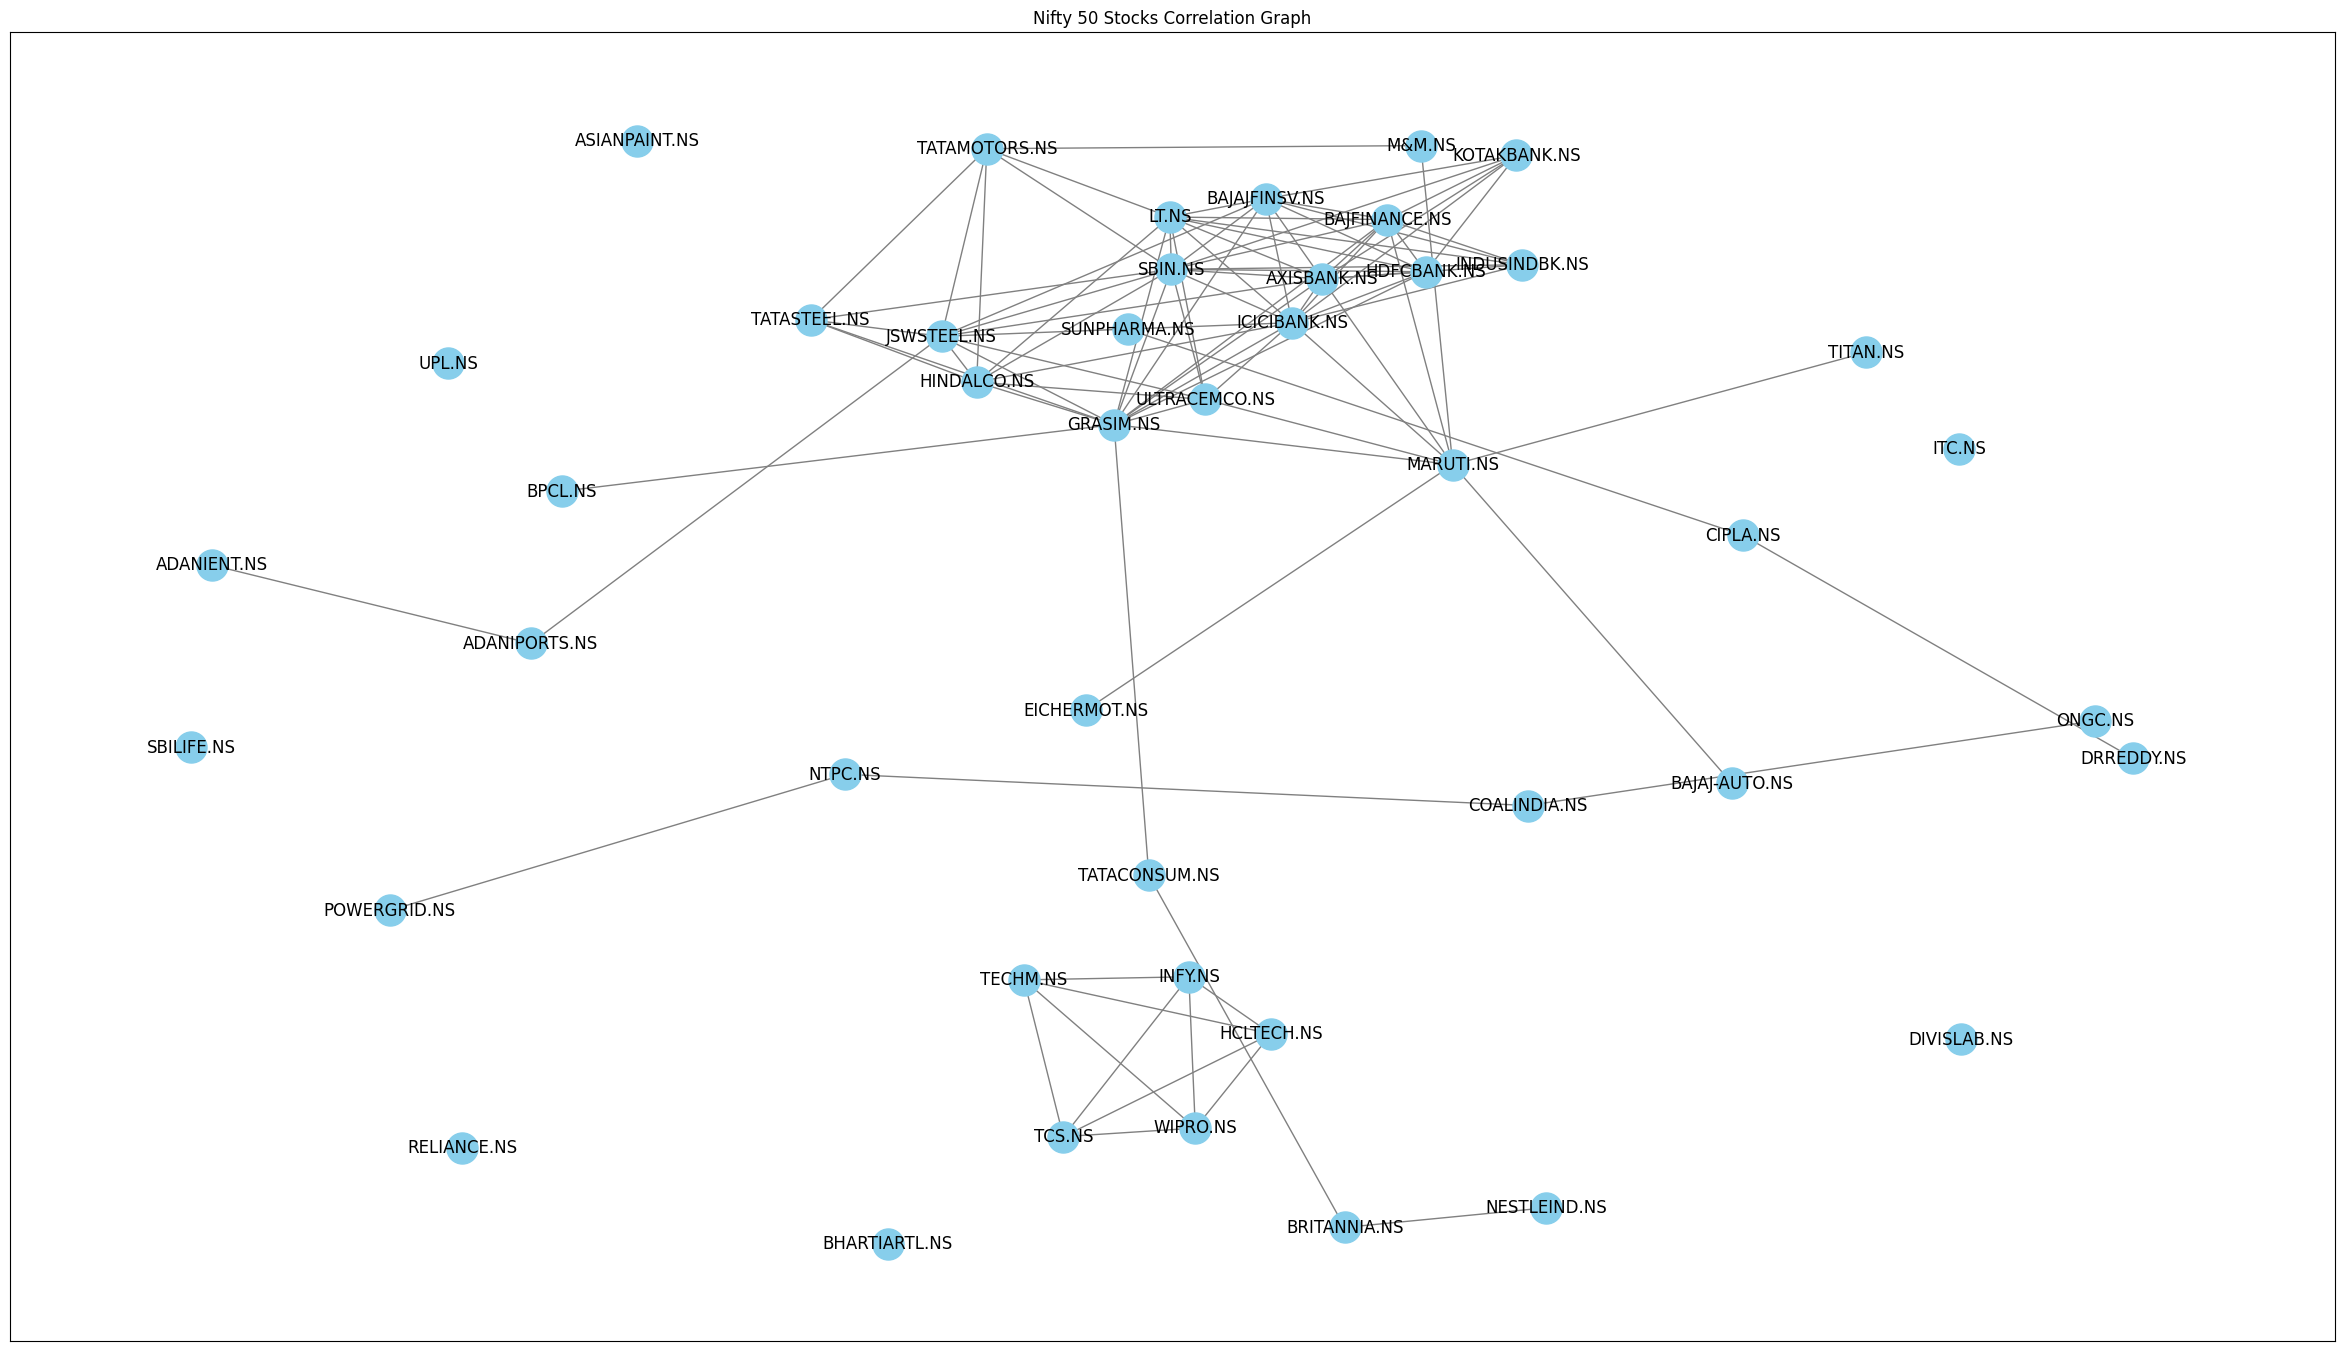

In [115]:
plt.figure(figsize=(30, 17))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx(G, pos, with_labels=True, node_size=500, node_color='skyblue', edge_color='gray')
plt.title("Nifty 50 Stocks Correlation Graph")
plt.show()


## Spectral Analysis

To get meaningful clusters in the stock graph, we use spectral clustering based on the graph’s Laplacian.

In [116]:
laplacian = nx.laplacian_matrix(G).toarray()
laplacian

array([[ 0.61896891, -0.61896891,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.61896891,  1.12382143,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  3.78224675,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  2.48213956]])

In [117]:
eigenvalues, eigenvectors = np.linalg.eigh(laplacian)
eigenvalues, eigenvectors

(array([-5.64369320e-16, -4.78844537e-16, -2.62207615e-16, -6.70776115e-17,
         0.00000000e+00,  8.18856267e-17,  1.44251422e-16,  2.97430831e-16,
         7.70937261e-16,  1.38983982e-15,  2.38011459e-15,  1.08012065e-01,
         2.01935655e-01,  3.24381792e-01,  3.90864842e-01,  5.10928169e-01,
         5.31462627e-01,  5.33236620e-01,  5.83915873e-01,  8.38422499e-01,
         9.67883182e-01,  1.13704739e+00,  1.49907150e+00,  1.59600313e+00,
         1.74840882e+00,  1.89411226e+00,  2.05430060e+00,  3.09582093e+00,
         3.13944903e+00,  3.19751518e+00,  3.26378368e+00,  3.29787097e+00,
         3.40592410e+00,  3.64816351e+00,  4.53504925e+00,  4.88860260e+00,
         5.19330445e+00,  5.63711842e+00,  6.07299941e+00,  6.69581620e+00,
         6.91435325e+00,  7.34596948e+00,  8.28607360e+00,  8.42176130e+00,
         8.71761730e+00]),
 array([[ 2.21327794e-12,  7.76517513e-12,  1.86071125e-12, ...,
          8.44047506e-04, -2.42590070e-04,  1.74089651e-04],
        [ 2

We can cluster stocks using the eigenvectors. For simplicity, let’s use k-means clustering on the first few eigenvectors.

Smallest Eigen vector representation tell strong connectivity

Assumption 2: k=5

In [122]:
from sklearn.cluster import KMeans

# Choose number of clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(eigenvectors[:, 1:num_clusters+1])

# Map stocks to clusters
stock_clusters = {stock: cluster for stock, cluster in zip(corr_matrix.columns, clusters)}
stock_clusters

{'ADANIENT.NS': 0,
 'ADANIPORTS.NS': 0,
 'ASIANPAINT.NS': 2,
 'AXISBANK.NS': 0,
 'BAJAJ-AUTO.NS': 0,
 'BAJAJFINSV.NS': 0,
 'BAJFINANCE.NS': 0,
 'BHARTIARTL.NS': 0,
 'BPCL.NS': 0,
 'BRITANNIA.NS': 0,
 'CIPLA.NS': 0,
 'COALINDIA.NS': 0,
 'DIVISLAB.NS': 4,
 'DRREDDY.NS': 0,
 'EICHERMOT.NS': 0,
 'GRASIM.NS': 0,
 'HCLTECH.NS': 0,
 'HDFCBANK.NS': 0,
 'HINDALCO.NS': 0,
 'ICICIBANK.NS': 0,
 'INDUSINDBK.NS': 0,
 'INFY.NS': 0,
 'ITC.NS': 4,
 'JSWSTEEL.NS': 0,
 'KOTAKBANK.NS': 0,
 'LT.NS': 0,
 'M&M.NS': 0,
 'MARUTI.NS': 0,
 'NESTLEIND.NS': 0,
 'NTPC.NS': 0,
 'ONGC.NS': 0,
 'POWERGRID.NS': 0,
 'RELIANCE.NS': 2,
 'SBILIFE.NS': 3,
 'SBIN.NS': 0,
 'SUNPHARMA.NS': 0,
 'TATACONSUM.NS': 0,
 'TATAMOTORS.NS': 0,
 'TATASTEEL.NS': 0,
 'TCS.NS': 0,
 'TECHM.NS': 0,
 'TITAN.NS': 0,
 'ULTRACEMCO.NS': 0,
 'UPL.NS': 1,
 'WIPRO.NS': 0}

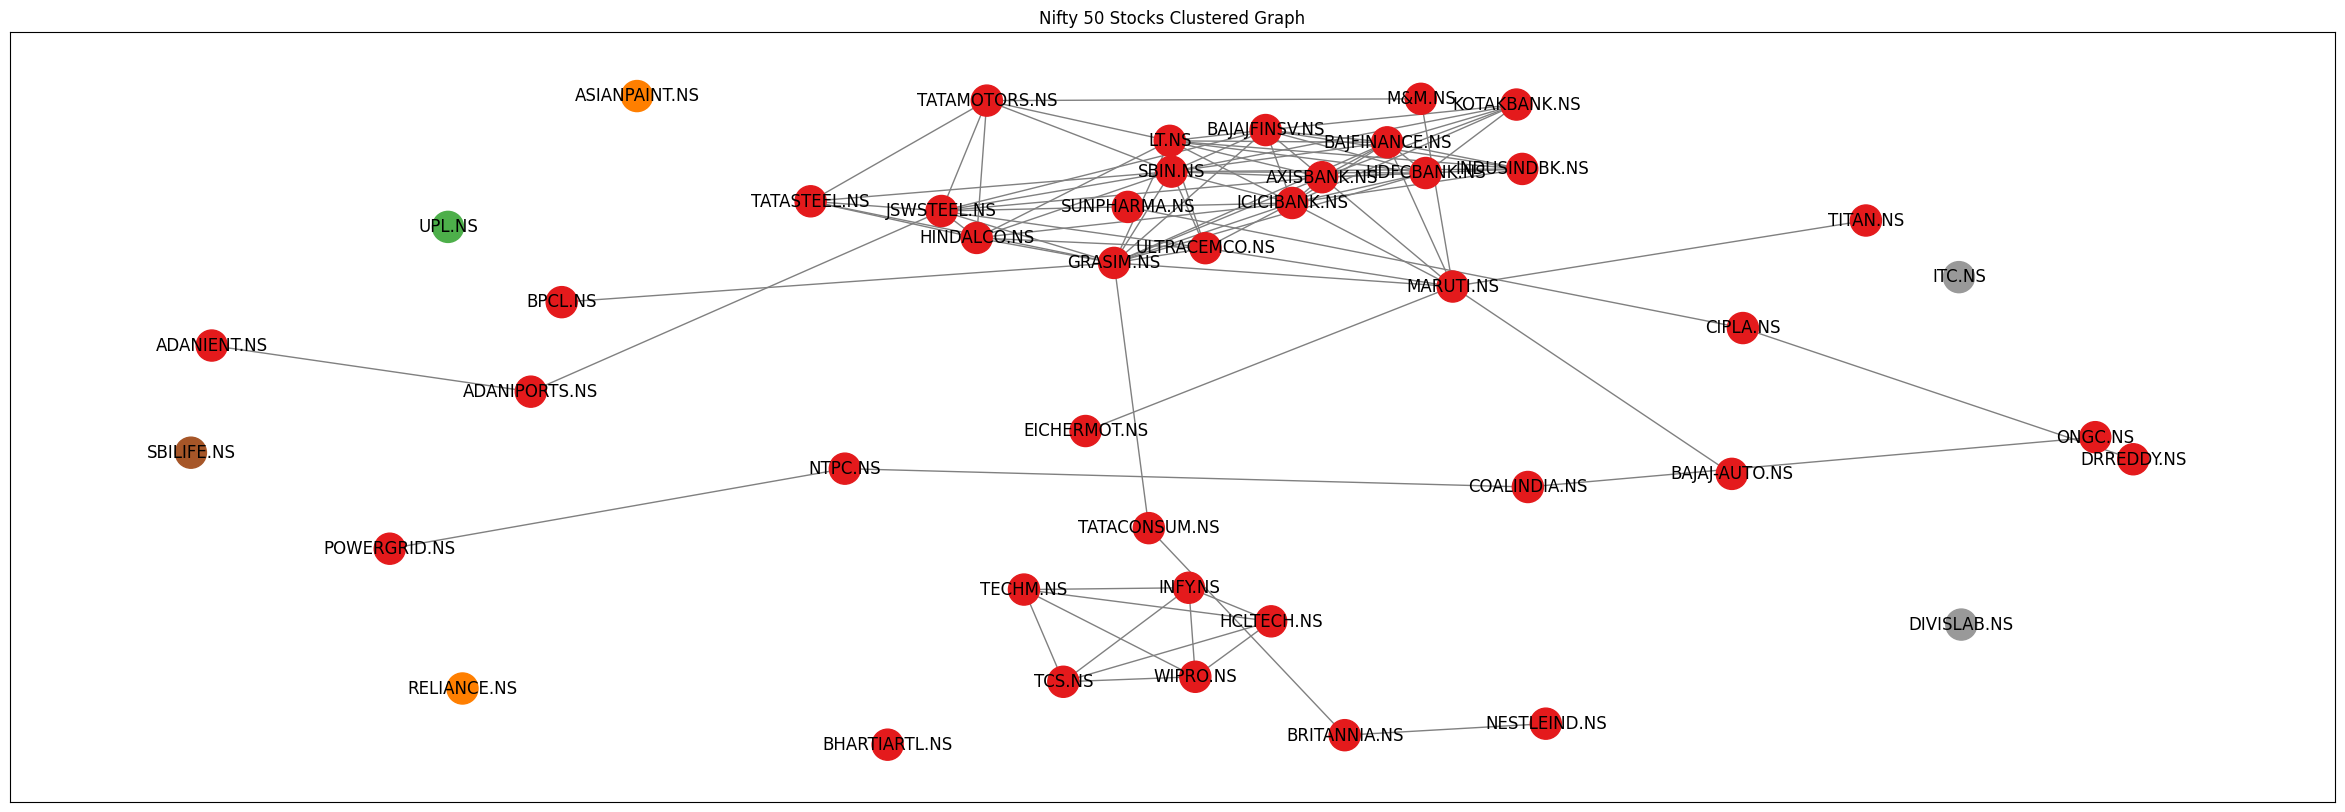

In [123]:
plt.figure(figsize=(30, 10))
nx.draw_networkx(G, pos, with_labels=True, node_size=500, node_color=[stock_clusters[stock] for stock in G.nodes()], edge_color='gray', cmap=plt.cm.Set1)
plt.title("Nifty 50 Stocks Clustered Graph")
plt.show()


In [124]:
# Additional use:
# Convert the dictionary to a DataFrame
clustered_stocks_df = pd.DataFrame(list(stock_clusters.items()), columns=['Stock', 'Cluster'])

# Sort by Cluster for easier readability
clustered_stocks_df = clustered_stocks_df.sort_values(by='Cluster').reset_index(drop=True)

# Display the clustered DataFrame
clustered_stocks_df

,Stock,Cluster
0,ADANIENT.NS,0
1,KOTAKBANK.NS,0
2,LT.NS,0
3,M&M.NS,0
4,MARUTI.NS,0
5,NESTLEIND.NS,0
6,NTPC.NS,0
7,ONGC.NS,0
8,POWERGRID.NS,0
9,SBIN.NS,0


Visualise clusters based on colours.


# Target : GCN MODEL

We'll use pytorch ...

In [46]:
# pip install torch

In [44]:
# pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


In [45]:
# !pip install torch-geometric
# !pip install torch-scatter torch-sparse torch-cluster torch-spline-conv


In [41]:
import torch_geometric
from torch_geometric.nn import GCNConv


c:\Users\user\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Define GCN layers

In [125]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv  # PyTorch Geometric GCN layer

class GCN(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_features, hidden_features)
        self.conv2 = GCNConv(hidden_features, out_features)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


Prepare Data for PyTorch Geometric:

Convert our graph to a format compatible with PyTorch Geometric.

In [126]:
from torch_geometric.utils import from_networkx

data = from_networkx(G)


In [127]:
data

Data(edge_index=[2, 192], weight=[192], num_nodes=45)

Initialise the GCN

Take the last available values as features

In [138]:
final_features = pd.DataFrame({
    'daily_return': daily_returns.iloc[-1],
    'volatility': average_volatility,
    'rsi': rsi.iloc[-1]
}).dropna()
final_features

,daily_return,volatility,rsi
Ticker,,,
ADANIENT.NS,0.012531,0.028128,42.435394
ADANIPORTS.NS,-0.001769,0.023796,36.320347
ASIANPAINT.NS,-0.008748,0.018060,38.053880
AXISBANK.NS,-0.000856,0.023893,47.905972
BAJAJ-AUTO.NS,0.013240,0.017004,52.171474
BAJAJFINSV.NS,0.023913,0.024348,43.163915
BAJFINANCE.NS,0.009876,0.025319,53.960575
BHARTIARTL.NS,-0.017850,0.019271,41.309407
BPCL.NS,0.010086,0.021445,26.342696


In [53]:
# features = torch.randn((len(G.nodes), 10))  # Random feature matrix, replace with actual stock features
# labels = torch.tensor([stock_clusters[stock] for stock in G.nodes()])  # Cluster as label
# data.x = features
# data.y = labels
# data.y = data.y.long()

# # Define model and optimizer
# model = GCN(in_features=10, hidden_features=16, out_features=num_clusters)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [139]:
# Assuming `final_features` DataFrame is ready with actual stock features
features = torch.tensor(final_features.values, dtype=torch.float)

# Map clusters to labels
labels = torch.tensor([stock_clusters[stock] for stock in G.nodes()])  # Cluster as label

# Set features and labels in `data` for GCN input
data.x = features  # Actual stock features (daily return, volatility, RSI)
data.y = labels.long()  # Convert labels to Long type for compatibility

# Define the GCN model with adjusted input dimensions
model = GCN(in_features=features.shape[1], hidden_features=16, out_features=num_clusters)

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


Training Loop:

In [140]:
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.nll_loss(out, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Training the GCN
for epoch in range(100):
    loss = train()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")


Epoch 0, Loss: 6.287970542907715
Epoch 10, Loss: 0.9502645134925842
Epoch 20, Loss: 0.8788933753967285
Epoch 30, Loss: 0.8033471703529358
Epoch 40, Loss: 0.6980301141738892
Epoch 50, Loss: 0.6299132704734802
Epoch 60, Loss: 0.5973607897758484
Epoch 70, Loss: 0.5749937891960144
Epoch 80, Loss: 0.5685237050056458
Epoch 90, Loss: 0.5668628215789795


------------------------------------------------------------------------------------------------

Validating the model

In [144]:
# Define a split date (e.g., 80% of the data for training, 20% for validation)
split_date = '2021-01-01'  # Adjust based on your data

# Split the dataset based on the split_date
train_data = datas[:split_date]
val_data = datas[split_date:]

# Calculate returns for both sets
train_returns = train_data.pct_change().dropna()
val_returns = val_data.pct_change().dropna()

# Re-calculate correlation matrices for train and validation sets
train_corr_matrix = train_returns.corr()
val_corr_matrix = val_returns.corr()


In [145]:
# Create the validation graph
G_val = nx.Graph()

# Add nodes
for stock in val_corr_matrix.columns:
    G_val.add_node(stock)

# Add edges for significant correlations (use the same threshold as training)
for i in val_corr_matrix.columns:
    for j in val_corr_matrix.columns:
        if i != j and abs(val_corr_matrix.loc[i, j]) > threshold:
            G_val.add_edge(i, j, weight=val_corr_matrix.loc[i, j])


In [146]:
from torch_geometric.utils import from_networkx

# Convert validation graph to PyTorch Geometric format
val_data_gcn = from_networkx(G_val)

# Apply the same feature and label transformations as for the training data
val_data_gcn.x = features  # use the same features as training or generate new ones for validation
val_data_gcn.y = torch.tensor([stock_clusters[stock] for stock in G_val.nodes()]).long()


In [148]:
model.eval()
with torch.no_grad():
    val_output = model(val_data_gcn.x, val_data_gcn.edge_index)
    val_loss = F.nll_loss(val_output, val_data_gcn.y)
    print(f"Validation Loss: {val_loss.item()}")


Validation Loss: 0.5550583600997925


Extract Node Embeddings for Portfolio Weights

In [149]:
model.eval()
with torch.no_grad():
    # Obtain the output (node embeddings) for each stock in the validation set
    node_embeddings = model(val_data_gcn.x, val_data_gcn.edge_index)


In [156]:
node_embeddings

array([-2.8387082, -2.8387082, -2.751573 , -3.0193696, -3.6088448,
       -2.6203682, -3.542441 , -2.9257705, -2.1874304, -2.7468457,
       -3.0171225, -3.6061032, -3.9064927, -2.4321103, -2.7265396,
       -2.6416821, -3.2374916, -2.632133 , -3.86556  , -3.9925385,
       -3.3504436, -3.2374916, -2.7310948, -3.86556  , -2.632133 ,
       -2.3020005, -3.0958571, -3.1304693, -2.3221478, -3.4744103,
       -3.1515248, -2.8693893, -2.8038337, -2.9507828, -3.350444 ,
       -4.0567713, -2.0792034, -2.6019778, -3.86556  , -3.2374916,
       -3.2374916, -3.582843 , -2.6416821, -2.106903 , -3.2374916],
      dtype=float32)

Convert embeddings to portfolio weights

In [157]:
# Sum up all node embeddings and divide each by the total to get portfolio weights
# Reduce embeddings to single values per stock (average across dimensions if necessary)
# node_embeddings = node_embeddings.mean(dim=1).cpu().numpy()

# Normalize to sum to 1 for use as portfolio weights
portfolio_weights = node_embeddings / node_embeddings.sum()


In [158]:
portfolio_weights

array([0.02071251, 0.02071251, 0.02007673, 0.0220307 , 0.02633178,
       0.0191194 , 0.02584727, 0.02134776, 0.01596049, 0.02004224,
       0.0220143 , 0.02631178, 0.02850355, 0.01774579, 0.01989408,
       0.01927492, 0.02362222, 0.01920524, 0.02820489, 0.02913138,
       0.02444637, 0.02362222, 0.01992732, 0.02820489, 0.01920524,
       0.01679645, 0.02258879, 0.02284133, 0.01694345, 0.02535088,
       0.02299496, 0.02093637, 0.02045805, 0.02153026, 0.02444637,
       0.02960006, 0.01517082, 0.01898522, 0.02820489, 0.02362222,
       0.02362222, 0.02614206, 0.01927492, 0.01537293, 0.02362222],
      dtype=float32)

In [159]:
# Assuming `nifty50_tickers` is a list of tickers matching the order in val_data_gcn
ticker_weights = {ticker: weight for ticker, weight in zip(nifty50_tickers, portfolio_weights)}

# Display the portfolio weights for each stock
for ticker, weight in ticker_weights.items():
    print(f"{ticker}: {weight:.4f}")


ADANIENT.NS: 0.0207
ADANIPORTS.NS: 0.0207
ASIANPAINT.NS: 0.0201
AXISBANK.NS: 0.0220
BAJAJ-AUTO.NS: 0.0263
BAJFINANCE.NS: 0.0191
BAJAJFINSV.NS: 0.0258
BHARTIARTL.NS: 0.0213
BPCL.NS: 0.0160
BRITANNIA.NS: 0.0200
CIPLA.NS: 0.0220
COALINDIA.NS: 0.0263
DIVISLAB.NS: 0.0285
DRREDDY.NS: 0.0177
EICHERMOT.NS: 0.0199
GRASIM.NS: 0.0193
HCLTECH.NS: 0.0236
HDFCBANK.NS: 0.0192
HINDALCO.NS: 0.0282
ICICIBANK.NS: 0.0291
INDUSINDBK.NS: 0.0244
INFY.NS: 0.0236
ITC.NS: 0.0199
JSWSTEEL.NS: 0.0282
KOTAKBANK.NS: 0.0192
LT.NS: 0.0168
M&M.NS: 0.0226
MARUTI.NS: 0.0228
NESTLEIND.NS: 0.0169
NTPC.NS: 0.0254
ONGC.NS: 0.0230
POWERGRID.NS: 0.0209
RELIANCE.NS: 0.0205
SBIN.NS: 0.0215
SBILIFE.NS: 0.0244
SUNPHARMA.NS: 0.0296
TATACONSUM.NS: 0.0152
TATAMOTORS.NS: 0.0190
TATASTEEL.NS: 0.0282
TCS.NS: 0.0236
TECHM.NS: 0.0236
TITAN.NS: 0.0261
ULTRACEMCO.NS: 0.0193
UPL.NS: 0.0154
WIPRO.NS: 0.0236


In [164]:
ticker_weights

{'ADANIENT.NS': 0.020712512,
 'ADANIPORTS.NS': 0.020712512,
 'ASIANPAINT.NS': 0.020076733,
 'AXISBANK.NS': 0.0220307,
 'BAJAJ-AUTO.NS': 0.026331779,
 'BAJFINANCE.NS': 0.019119402,
 'BAJAJFINSV.NS': 0.025847265,
 'BHARTIARTL.NS': 0.021347757,
 'BPCL.NS': 0.01596049,
 'BRITANNIA.NS': 0.02004224,
 'CIPLA.NS': 0.022014303,
 'COALINDIA.NS': 0.026311776,
 'DIVISLAB.NS': 0.028503554,
 'DRREDDY.NS': 0.017745787,
 'EICHERMOT.NS': 0.019894078,
 'GRASIM.NS': 0.019274918,
 'HCLTECH.NS': 0.023622217,
 'HDFCBANK.NS': 0.019205244,
 'HINDALCO.NS': 0.028204892,
 'ICICIBANK.NS': 0.029131385,
 'INDUSINDBK.NS': 0.024446366,
 'INFY.NS': 0.023622217,
 'ITC.NS': 0.019927315,
 'JSWSTEEL.NS': 0.028204892,
 'KOTAKBANK.NS': 0.019205244,
 'LT.NS': 0.016796447,
 'M&M.NS': 0.022588788,
 'MARUTI.NS': 0.022841334,
 'NESTLEIND.NS': 0.016943451,
 'NTPC.NS': 0.025350884,
 'ONGC.NS': 0.022994963,
 'POWERGRID.NS': 0.020936374,
 'RELIANCE.NS': 0.020458052,
 'SBIN.NS': 0.02153026,
 'SBILIFE.NS': 0.02444637,
 'SUNPHARMA.NS':

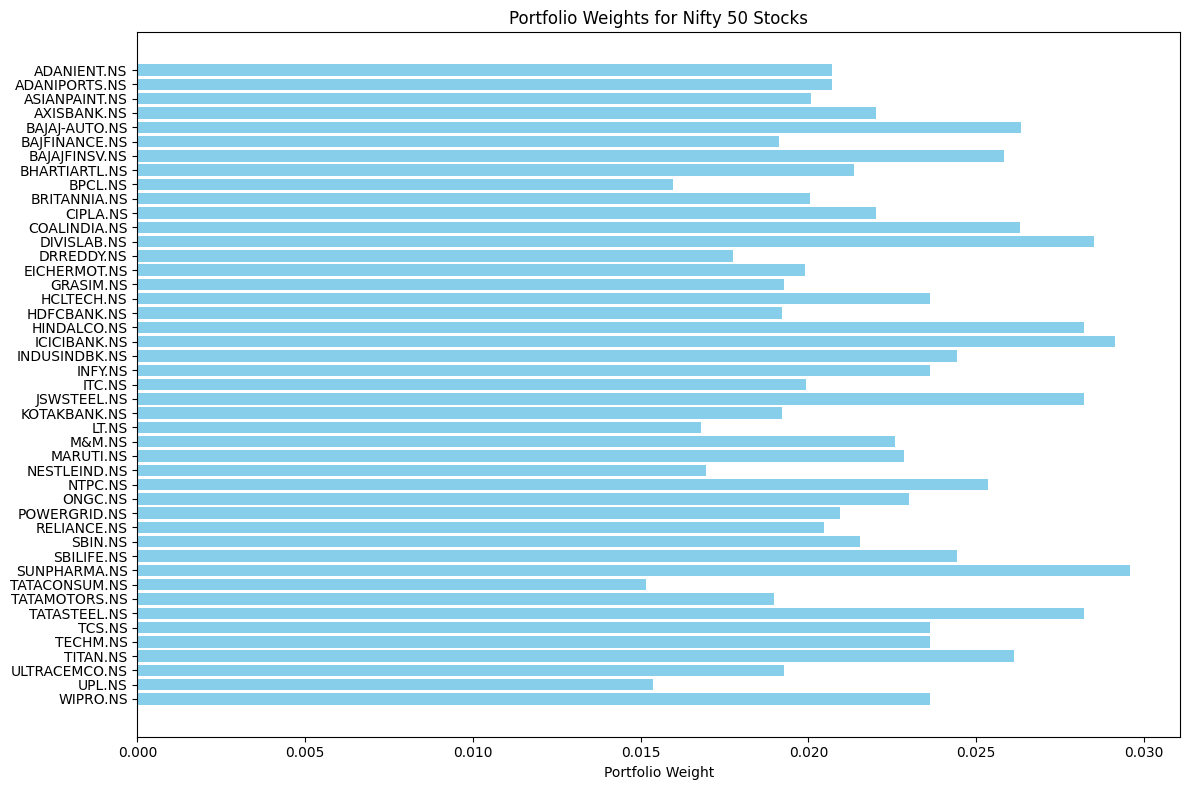

In [165]:
tickers = list(ticker_weights.keys())
weights = list(ticker_weights.values())

plt.figure(figsize=(12, 8))
plt.barh(tickers, weights, color='skyblue')
plt.xlabel('Portfolio Weight')
plt.title('Portfolio Weights for Nifty 50 Stocks')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest-weighted stocks at the top
plt.tight_layout()
plt.show()

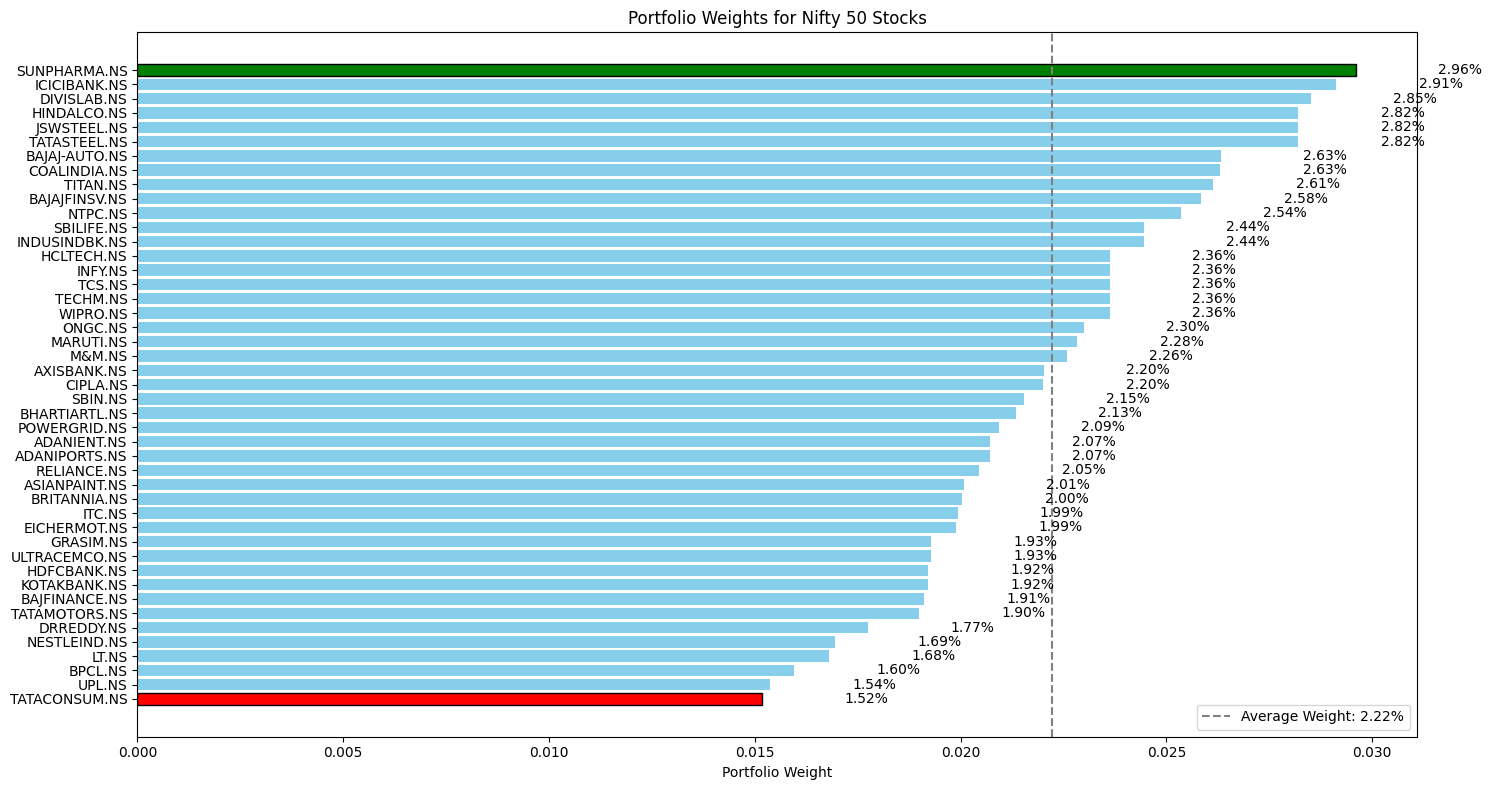

In [167]:
sorted_ticker_weights = dict(sorted(ticker_weights.items(), key=lambda item: item[1], reverse=True))
tickers = list(sorted_ticker_weights.keys())
weights = list(sorted_ticker_weights.values())

# Determine max and min weights for special highlighting
max_weight = max(weights)
min_weight = min(weights)

# Plot
plt.figure(figsize=(15, 8))
bars = plt.barh(tickers, weights, color='skyblue')

# Highlight the max and min weight bars
for bar, weight in zip(bars, weights):
    if weight == max_weight:
        bar.set_color('green')
        bar.set_edgecolor('black')
    elif weight == min_weight:
        bar.set_color('red')
        bar.set_edgecolor('black')

# Add weight labels on each bar
for i, (weight, bar) in enumerate(zip(weights, bars)):
    plt.text(weight + 0.002, bar.get_y() + bar.get_height() / 2,
             f'{weight:.2%}', va='center', fontsize=10)

# Add a line for the average weight
average_weight = sum(weights) / len(weights)
plt.axvline(average_weight, color='gray', linestyle='--', label=f'Average Weight: {average_weight:.2%}')

# Titles and labels
plt.xlabel('Portfolio Weight')
plt.title('Portfolio Weights for Nifty 50 Stocks')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to display highest weights at the top
plt.tight_layout()
plt.show()

In [160]:
# Map portfolio weights to tickers
# Ensure `val_returns` is indexed by `nifty50_tickers`
val_returns = val_returns[nifty50_tickers]

# Multiply each stock's daily return by its portfolio weight
weighted_returns = val_returns.mul(portfolio_weights, axis=1)
portfolio_daily_returns = weighted_returns.sum(axis=1)


In [163]:
portfolio_daily_returns

Date
2021-01-04 00:00:00+00:00    0.014002
2021-01-05 00:00:00+00:00   -0.000138
2021-01-06 00:00:00+00:00    0.001868
2021-01-07 00:00:00+00:00    0.006293
2021-01-08 00:00:00+00:00    0.017076
                               ...   
2022-12-26 00:00:00+00:00    0.010580
2022-12-27 00:00:00+00:00    0.010465
2022-12-28 00:00:00+00:00    0.000336
2022-12-29 00:00:00+00:00    0.003442
2022-12-30 00:00:00+00:00   -0.001481
Length: 495, dtype: float64

In [162]:
# Cumulative return
cumulative_return = (1 + portfolio_daily_returns).prod() - 1

# Annualized volatility (assuming 252 trading days in a year)
annualized_volatility = portfolio_daily_returns.std() * np.sqrt(252)

# Sharpe ratio (assuming risk-free rate is close to zero)
sharpe_ratio = portfolio_daily_returns.mean() / portfolio_daily_returns.std() * np.sqrt(252)

print(f"Cumulative Return: {cumulative_return:.4f}")
print(f"Annualized Volatility: {annualized_volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")


Cumulative Return: 0.5278
Annualized Volatility: 0.1678
Sharpe Ratio: 1.3704


---------------------------------------------------------------------